In [1]:
#Look at linear, type of correlation, independent of year
#Idea: pairplot by region!! 


In [2]:
import statsmodels.api as sm
import pandas as pd
# Load the data
data = pd.read_csv('happiness_dataset.csv')
print(data.isnull().sum())
for feature in ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']:
    data[feature] = data.groupby('Country name')[feature].transform(lambda x: x.fillna(x.mean()))
print(data.isnull().sum())
#drop 
for feature in ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']:
    data[feature] = data.groupby('Country name')[feature].transform(lambda x: x.fillna(0))
print(data.isnull().sum())    
X = data[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']] 
y = data['Life Ladder']
# Adding a constant to the model (intercept)
X = sm.add_constant(X)
# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64
Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   9
Social support                       1
Healthy life expectancy at birth    50
Freedom to make life choices         0
Generosity                           9
Perceptions of corruption           30
Positive affect                     24
Negative affect                     16
dtype: int64
Country name                         0
year                                 0
Life Ladder                

In [3]:
#Dictionary of countries by region

countries_by_region = {
    'Africa': [
        'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 'Central African Republic',
        'Chad', 'Comoros', 'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
        'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
        'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
        'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia',
        'Uganda', 'Zambia', 'Zimbabwe'
    ],
    'Asia': [
        'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia',
        'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon',
        'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar',
        'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey',
        'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'
    ],
    'Europe': [
        'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic',
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia',
        'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
        'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
        'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'
    ],
    'North America': [
        'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic',
        'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis',
        'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'
    ],
    'South America': [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
    ],
    'Australia/Oceania': [
        'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa',
        'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
    ],
    'Middle East': [
        'Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen'
    ]
}

/Users/nicolesaade/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


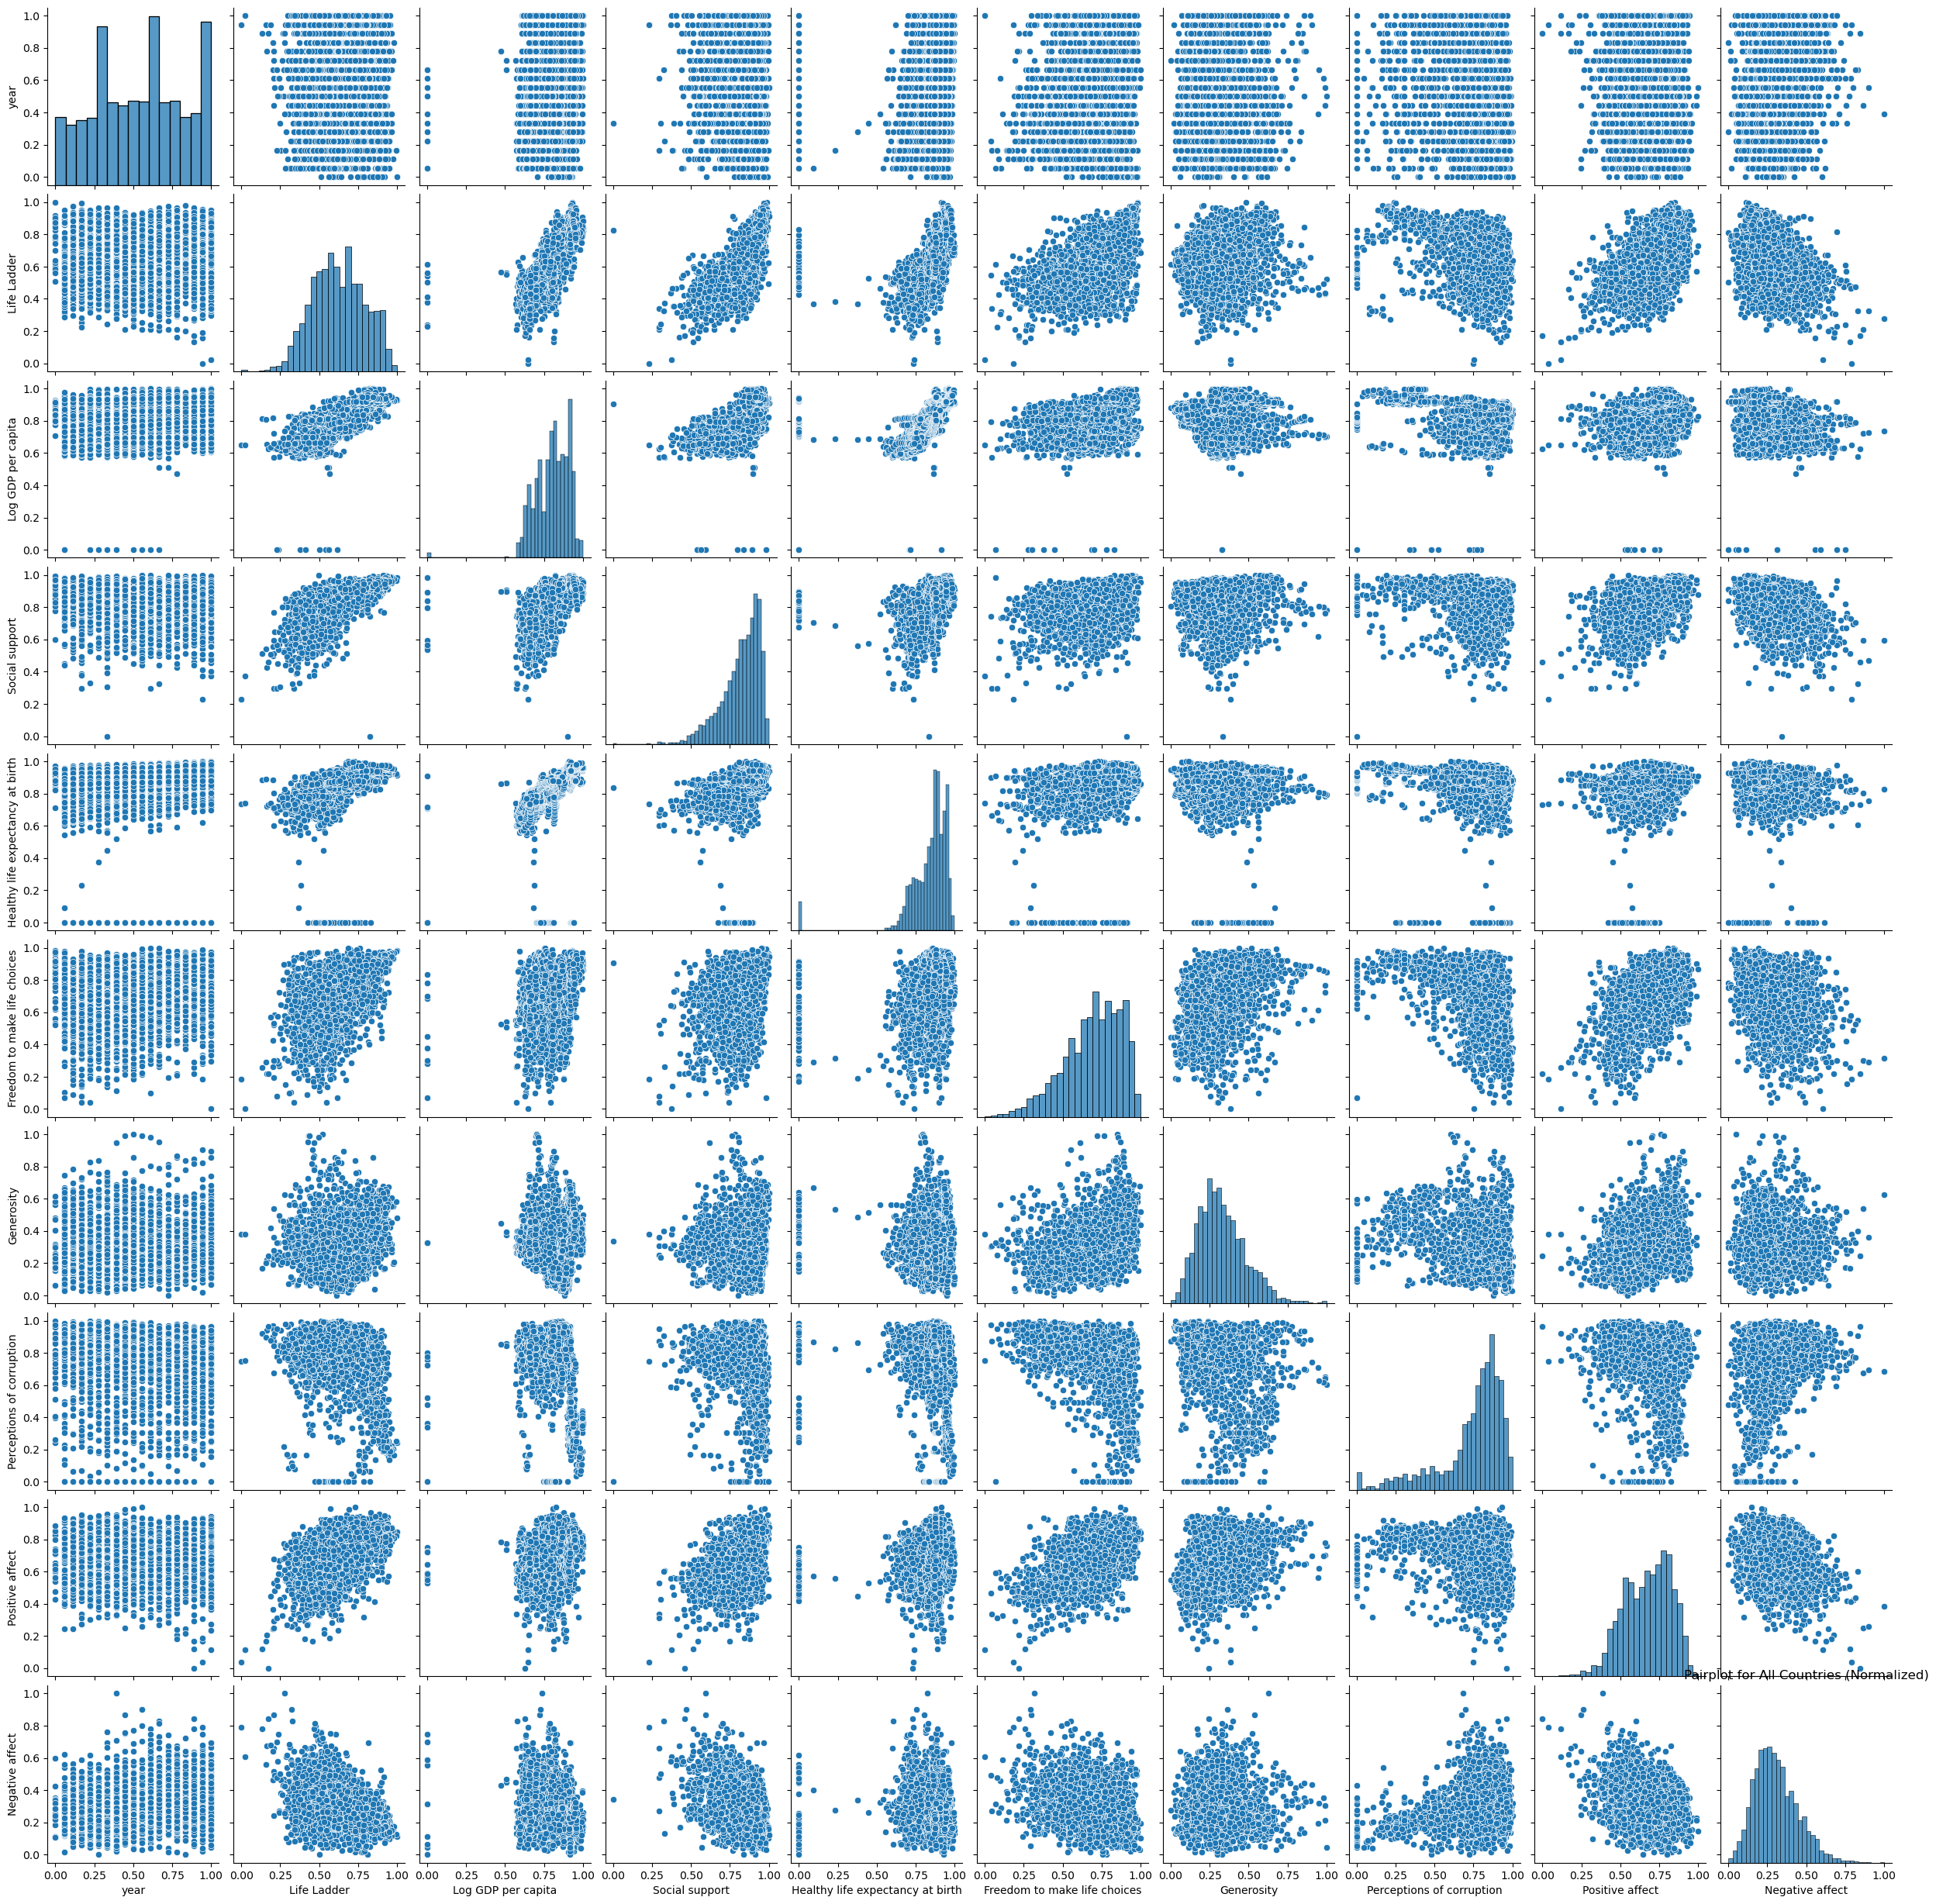


Features with Highest Correlation:
Life Ladder and Log GDP per capita: 0.7270610522417739
Life Ladder and Social support: 0.7126962658408929
Life Ladder and Freedom to make life choices: 0.5331476820381579
Life Ladder and Positive affect: 0.5152831989958638
Log GDP per capita and Social support: 0.6192219258458701
Log GDP per capita and Healthy life expectancy at birth: 0.5052285852405098
Freedom to make life choices and Positive affect: 0.5776183075508967


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Create pairplot for all countries
def create_pairplot_for_all_countries(data):
    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = pd.DataFrame(scaler.fit_transform(data.drop(columns=['Country name'])), columns=data.columns[1:])
    
    # Add 'Country' column back to the normalized data
    normalized_data['Country name'] = data['Country name']
    
    # Create pairplot for the normalized data
    sns.pairplot(normalized_data)
    plt.title('Pairplot for All Countries (Normalized)')
    plt.show()
    
    # Calculate and print correlation matrix
    normalized_data = normalized_data.drop('Country name', axis=1)
    correlation_matrix = normalized_data.corr()
    # Print features with highest correlation
    print("\nFeatures with Highest Correlation:")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]}")

# Create pairplot for all countries in the dataset
create_pairplot_for_all_countries(data)

In [ ]:
df = pd.read_csv("happiness_age.csv")

In [ ]:
def count_age_groups(df):
    age_counts = {'Old': 0, 'Young': 0, 'LowerMiddle': 0, 'UpperMiddle': 0}
    for index, row in df.iterrows():
        age_counts[row['Happiest']] += 1
    return age_counts

counts = count_age_groups(df)
print(counts)

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.bar(counts.keys(), counts.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Counts of Age Groups')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def count_age_groups_for_region(df, region):
    #TODO: document which group is chategorized as what 
    age_counts = {'Old': 0, 'Young': 0, 'LowerMiddle': 0, 'UpperMiddle': 0}
    countries_in_region = countries_by_region[region]
    for country in countries_in_region:
        if country in df['Country'].values:
            row = df[df['Country'] == country].iloc[0]
            age_counts[row['Happiest']] += 1
    return age_counts

# Group regions into chunks of three
regions = list(countries_by_region.keys())
region_chunks = [regions[i:i+3] for i in range(0, len(regions), 3)]

for chunk in region_chunks:
    # Plotting
    fig, axes = plt.subplots(1, len(chunk), figsize=(15, 5))
    if len(chunk) == 1:
        axes = [axes]  
    for i, region in enumerate(chunk):
        counts = count_age_groups_for_region(df, region)
        ax = axes[i]
        ax.bar(counts.keys(), counts.values(), color=['blue', 'green', 'orange', 'red'])
        ax.set_xlabel('Age Group')
        ax.set_ylabel('Count')
        ax.set_title(f'Counts of Age Groups in {region}')
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def count_age_groups_for_region(df, region):
    #TODO: document which group is chategorized as what 
    age_counts = {'Old': 0, 'Young': 0, 'LowerMiddle': 0, 'UpperMiddle': 0}
    countries_in_region = countries_by_region[region]
    for country in countries_in_region:
        if country in df['Country'].values:
            row = df[df['Country'] == country].iloc[0]
            age_counts[row['Least Happy']] += 1
    return age_counts

# Group regions into chunks of three
regions = list(countries_by_region.keys())
region_chunks = [regions[i:i+3] for i in range(0, len(regions), 3)]

for chunk in region_chunks:
    # Plotting
    fig, axes = plt.subplots(1, len(chunk), figsize=(15, 5))
    if len(chunk) == 1:
        axes = [axes]  # Ensure axes is a list even if there's only one subplot
    for i, region in enumerate(chunk):
        counts = count_age_groups_for_region(df, region)
        ax = axes[i]
        ax.bar(counts.keys(), counts.values(), color=['blue', 'green', 'orange', 'red'])
        ax.set_xlabel('Age Group')
        ax.set_ylabel('Count')
        ax.set_title(f'Counts of Age Groups in {region}')
    plt.tight_layout()
    plt.show()